# Utility Functions

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


## Function to generate dataset with bias

In [2]:
def generate_dataset(mu,sigma, shape):
    
    X_without_bias = np.random.normal(mu, sigma, shape)
    bias_column = np.ones((100,1))
    X = np.append(bias_column, X_without_bias, axis=1)
    Y = np.random.uniform(1,2,100)
    return X,Y

## Function to get matrix transpose

In [3]:
def get_matrix_transpose(matrix):
    
    rows = len(matrix)
    columns = len(matrix[0])
    return np.array([[matrix[row][col] for row in range(rows)] for col in range(columns)])

## Function that will help in calculating determinant of matrix

In [4]:
def reduce_row_column(matrix, i, j):
    
    rows = len(matrix)
    columns = len(matrix[0])
    return [[matrix[row][col] for col in range(columns) if col != j] for row in range(rows) if row != i]

## Function to get matrix minor

In [5]:
def getMatrixMinor(matrix, i, j):
    
    matrix = reduce_row_column(matrix, i, j)
    return get_matrix_determinant(matrix)

## Function to get matrix determinant

In [6]:
def get_matrix_determinant(matrix):
    
    if len(matrix) == 2:
        return matrix[0][0]*matrix[1][1]-matrix[0][1]*matrix[1][0]
    
    determinant = 0
    for c in range(len(matrix)):
        determinant += ((-1)**c)*matrix[0][c]*getMatrixMinor(matrix,0,c)
    return determinant

## Function to get matrix inverse of 3x3 matrix using co-factor method

In [7]:
## According to co-factor method, inverse of matrix = (cofactor matrix / matrix determinant) ##

## To get co-factor matrix, wo do following steps:
#    1)The Minor(i j) of entry a(i,j) is the determinant of the matrix that remains after we eliminate the ith row and 
#       jth column of matrix A.
#    2) cofactor C(i,j) of entry A(i,j) is (-1)i+ j(Minor(i j)). ##

# To get detail understanding of how this method works please using following link:
# http://www.the-mathroom.ca/lnalg/lnalg1.5/lnalg1.5.htm


def get_matrix_inverse(matrix):
    
    determinant = get_matrix_determinant(matrix)
    
    #find matrix of cofactors
    cofactors = []
    for r in range(len(matrix)):
        cofactorRow = []
        for c in range(len(matrix)):
            minor = getMatrixMinor(matrix,r,c) ##get matrix minor of specific position
            coefficient = (-1)**(r+c) ## find that position co-efficient
            cofactorRow.append(coefficient * minor) ## multiply coefficient with minor to get cofactor C(i,j) value
        cofactors.append(cofactorRow)
    cofactors = get_matrix_transpose(cofactors)
    
    inverse = [[element / determinant for element in row] for row in cofactors]  # Divide by determinant
    return inverse

## Function to get beta_hat by solving system of normal equations


In [8]:
def learn_linreg_NormEqu(X,Y):
    
    X_transpose = get_matrix_transpose(X)
    A = np.dot(X_transpose , X)
    b = np.dot(X_transpose , Y)
    inverse_A = get_matrix_inverse(A)
    beta_hat = np.dot(inverse_A,b)
    return beta_hat

## Function to do prediction (y_hat) on feature matrix X

In [9]:
def predict_simple_line_regression(matrix, beta_hat):
    
    y_hat = beta_hat[0] + np.multiply(beta_hat[1], matrix[:, 1]) + np.multiply(beta_hat[2], matrix[:, 2])
    return y_hat

## Function to draw simple 3-D scatter plot

In [10]:
def draw_3d_graph(X, Y, prediction, beta_hat):
    
    #plane calculation
    k = 10 #size of the plane
    p1, p2 = np.mgrid[:k, :k]
    P = np.hstack((np.reshape(p1, (k*k, 1)), np.reshape(p2, (k*k, 1))))
    plane = np.reshape(prediction, (k, k));

    #plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(X[:,0], X[:,0],Y ,'ro') #scatter plot
    ax.plot_surface(p1,p2,plane) #plane plot
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Y')

    plt.show()

## Function to learn beta_hat and predict y_hat using lstsq buildin function

In [13]:
def learn_predict_linear_regression_using_lstsq(X, Y):
    
    beta_hat = np.linalg.lstsq(X, Y, rcond=None)[0]
    print(f"Using lstsq method = > B0 is {beta_hat[0]}, B1 is { beta_hat[1]}, B2 is { beta_hat[2]}")
    

## Main function 
## Main Function

<ol>
  <p>Steps followed in main function to solve the problem:</p>
    <br>
  <li>First set the variable values for generating dataset as specified in the question.</li>
  <li>Then use generate dataset function to generate feature matrix X and actual prediction vector Y. Here I did add the bias column in the Feature matrix X</li>
  <li>Use learn_linreg_NormEqu function to get values of beta_hat (B0,B1,B2). Here we also make use of inverse function as required in exercise.</li> 
  <li>Get Prediction vector using predict_simple_line_regression function.</li> 
   <li>Plotted 3D plot with Feature matrix X first column on x-axis, Feature matrix X second column on y-axis, Actual prediction vector Y on z-axis. The red dots are training points and 2-d plane is predictioned values.</li>
   <li>Finally used the learn_predict_linear_regression_using_lstsq function to get B_0, B_1, B_2 values. By using learn_predict_linear_regression_using_lstsq function we get same B_0, B_1, B_2 values as we get by using learn_linreg_NormEqu function.</li>
</ol>

In [15]:
def main():
    
    mu = 2  # mean
    sigma = 0.01  # standard deviation
    shape = (100, 2)  # dimensions of matrix
    
    X,Y = generate_dataset(mu, sigma, shape)
    beta_hat = learn_linreg_NormEqu(X,Y)
    
    print(f"By solving normal equation: B0 is {beta_hat[0]}, B1 is {beta_hat[1]}, B3 is {beta_hat[2]}")
        
    prediction = predict_simple_line_regression(X, beta_hat)
    draw_3d_graph (X,Y,prediction,prediction)

    lstsq_predictions = learn_predict_linear_regression_using_lstsq(X,Y)
    

<hr style="border:2px solid gray"> </hr>

## Running main function

By solving normal equation: B0 is -2.0316044739447534, B1 is -0.6479010964185363, B3 is 2.423705705044995


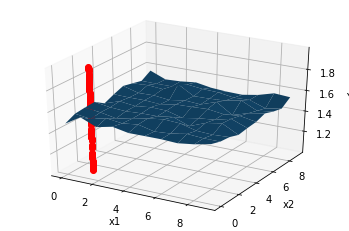

Using lstsq method = > B0 is -2.0316043841796554, B1 is -0.6479006949136988, B2 is 2.423705794822203


In [16]:
if __name__ == "__main__":
    main()